In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_temp = pd.read_csv('./data/data_mintemp.csv', header=0, index_col='Date', usecols=['Date', 'Temp'],parse_dates=True)
df_cons = pd.read_csv('./data/data_cons.csv', header=0, index_col='Date', usecols=['Date', 'Consumption'],parse_dates=True)
df_wind_solar = pd.read_csv('./data/data_cons.csv', header=0, index_col='Date', usecols=['Date', 'Wind+Solar'],parse_dates=True)

#df_wind_solar['Wind+Solar'] = df_wind_solar['Wind+Solar'].fillna(df_wind_solar['Wind+Solar'].mean())
df_wind_solar= df_wind_solar.dropna()
#ici on perd en précision de quelques jours (nb de jours qui sont n/a dans le tableau), mais au moins on a tjrs le sma-365

def mv_av(df,nomElect):
    df['SMA_7'] = df[nomElect].rolling(7).mean()
    df['SMA_30'] = df[nomElect].rolling(30).mean()
    df['SMA_365'] = df[nomElect].rolling(365).mean()
    df['value-365']=df[nomElect]-df['SMA_365']
    df['SMA_30(value-365)'] = df['value-365'].rolling('30D').mean()
    df['value-365-30'] =df['value-365'] - df['SMA_30(value-365)']

mv_av(df_temp,'Temp')
mv_av(df_cons,'Consumption')
mv_av(df_wind_solar, 'Wind+Solar')

plt.figure(1)
plt.plot(df_temp['Temp'],label='Temp', alpha=0.5)
plt.plot(df_temp['SMA_7'],label='SMA_7', alpha=0.5)
plt.plot(df_temp['SMA_30'],label='SMA_30', alpha=0.5)
plt.plot(df_temp['SMA_365'],label='SMA_365', alpha=0.5)
plt.legend(prop={'size': 7})
plt.savefig('E3_2_b_temp')

plt.figure(2)
plt.plot(df_cons['Consumption'],label='Consumption', alpha=0.5)
plt.plot(df_cons['SMA_7'],label='SMA_7', alpha=0.5)
plt.plot(df_cons['SMA_30'],label='SMA_30', alpha=0.5)
plt.plot(df_cons['SMA_365'],label='SMA_365', alpha=0.5)
plt.legend(prop={'size': 7})
plt.savefig('E3_2_b_cons')

plt.figure(3)
plt.plot(df_wind_solar['Wind+Solar'],label='Wind+Solar', alpha=0.5)
plt.plot(df_wind_solar['SMA_7'],label='SMA_7', alpha=0.5)
plt.plot(df_wind_solar['SMA_30'],label='SMA_30', alpha=0.5)
plt.plot(df_wind_solar['SMA_365'],label='SMA_365', alpha=0.5)
plt.legend(prop={'size': 7})
plt.savefig('E3_2_b_WindSolar')



D:\Programmes\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


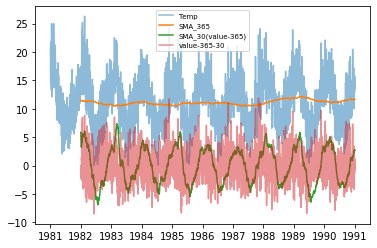

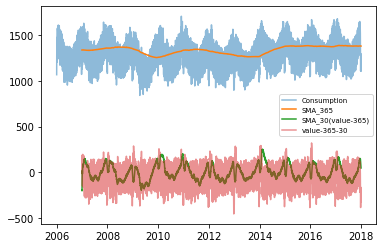

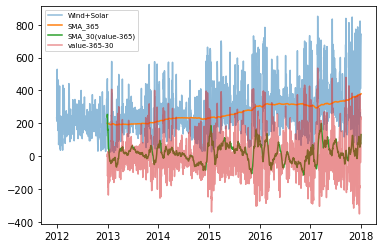

In [2]:
plt.figure(4)
plt.plot(df_temp['Temp'],label='Temp', alpha=0.5)
plt.plot(df_temp['SMA_365'],label='SMA_365')
plt.plot(df_temp['SMA_30(value-365)'],label='SMA_30(value-365)')
plt.plot(df_temp['value-365-30'],label='value-365-30', alpha=0.5)
plt.legend(prop={'size': 7})
plt.savefig('E3_2_f_temp')

plt.figure(5)
plt.plot(df_cons['Consumption'],label='Consumption', alpha=0.5)
plt.plot(df_cons['SMA_365'],label='SMA_365')
plt.plot(df_cons['SMA_30(value-365)'],label='SMA_30(value-365)')
plt.plot(df_cons['value-365-30'],label='value-365-30', alpha=0.5)
plt.legend(prop={'size': 7})
plt.savefig('E3_2_f_cons')

plt.figure(6)
plt.plot(df_wind_solar['Wind+Solar'],label='Wind+Solar', alpha=0.5)
plt.plot(df_wind_solar['SMA_365'],label='SMA_365')
plt.plot(df_wind_solar['SMA_30(value-365)'],label='SMA_30(value-365)')
plt.plot(df_wind_solar['value-365-30'],label='value-365-30', alpha=0.5)
plt.legend(prop={'size': 7})
plt.savefig('E3_2_f_WindSolar')

In [3]:
df_temp['shift_92'] = df_temp['Temp'].shift(92)
#print(df_temp['Temp'],df_temp['shift_7'])
df_temp['shift_182'] = df_temp['Temp'].shift(182)
df_temp['shift_365'] = df_temp['Temp'].shift(365)

corr1=df_temp['Temp'].corr(df_temp['shift_92'])
corr2=df_temp['Temp'].corr(df_temp['shift_182'])
corr3=df_temp['Temp'].corr(df_temp['shift_365'])
print(corr1,corr2,corr3)

-0.013857917952514618 -0.5054839396806423 0.5334852661349853


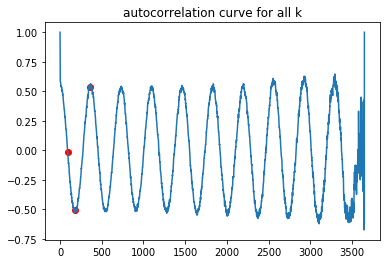

In [4]:
l=df_temp.shape[0]-1

v=[]
for i in range(l):
    v.append(df_temp['Temp'].corr(df_temp['Temp'].shift(i)))

plt.plot(v)
plt.scatter([92,182,365],[corr1,corr2,corr3],color='red')
plt.title('autocorrelation curve for all k')
plt.savefig('E3_3_autocorrCurve')

In [5]:
#4-5-6

2.442917108765627


Text(0.5, 1.0, 'test fonction temp deep = 7')

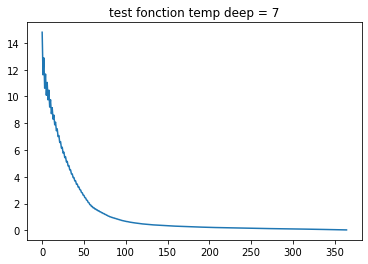

In [18]:
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
q=7
def f1(y,a):#,s):
    return (a@(y[::-1]))


def f2(n_train):
    rho, sigma = sm.regression.yule_walker(n_train,order=q)#, order=4,method="mle")
    return [rho,sigma]

print(f2(df_temp['Temp'])[1])

dft=df_temp['Temp']


dftN=dft.to_numpy().copy()

for i in range(365):
    dftN[-(364-i)]=f1(dftN[len(dftN)-365-q+i:len(dftN)-365+i],f2(dftN[len(dftN)-365:])[0])#,f2(dftN[len(dftN)-365:])[1])

plt.plot(dftN[len(dftN)-365:])
plt.title('test fonction temp deep = 7')

2.403346968761015


Text(0.5, 1.0, 'test fonction temp deep = 30')

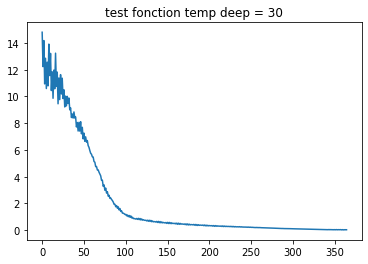

In [17]:
q=30
def f1(y,a):#,s):
    return (a@(y[::-1]))
        

def f2(n_train):
    rho, sigma = sm.regression.yule_walker(n_train,order=q)#, order=4,method="mle")
    return [rho,sigma]

print(f2(df_temp['Temp'])[1])

dft=df_temp['Temp']


dftN=dft.to_numpy().copy()

for i in range(365):
    dftN[-(364-i)]=f1(dftN[len(dftN)-365-q+i:len(dftN)-365+i],f2(dftN[len(dftN)-365:])[0])#,f2(dftN[len(dftN)-365:])[1])

plt.plot(dftN[len(dftN)-365:])
plt.title('test fonction temp deep = 30')

D:\Programmes\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


Coefficients: [ 0.7149111   0.66254313 -0.037084    0.08977874  0.01185065  0.02493563
  0.06341346  0.12055671]
Test RMSE: 3.728


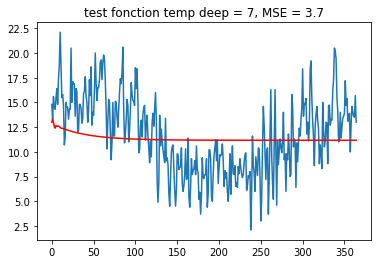

In [23]:

# load dataset
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = df_temp['Temp'].values
train, test = X[len(X)-2*365:len(X)-365], X[len(X)-365:]
# train autoregression
model = AutoReg(train, lags=7)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('test fonction temp deep = 7, MSE = 3.7')
plt.show()


D:\Programmes\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


Coefficients: [ 0.48435685  0.62078166 -0.03036742  0.10221098 -0.02245375 -0.02211397
  0.04339732  0.10184425 -0.03528421  0.03150314 -0.03712553  0.08453075
  0.00334498  0.03942849 -0.10403042  0.06012507  0.01345002  0.06699862
  0.12345104 -0.16850821  0.12378113 -0.02767685 -0.03049609  0.01285225
  0.06833225  0.01021966  0.0893814  -0.15227106  0.00894607 -0.03546498
  0.01324755]
Test RMSE: 3.677


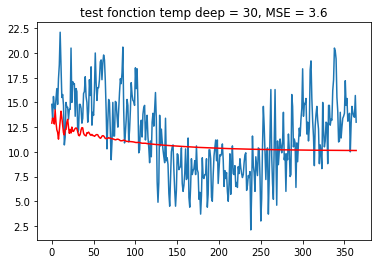

In [24]:

# load dataset
#series = read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# split dataset
X = df_temp['Temp'].values
train, test = X[len(X)-2*365:len(X)-365], X[len(X)-365:]
# train autoregression
model = AutoReg(train, lags=30)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
#for i in range(len(predictions)):
#    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
plt.plot(test)
plt.plot(predictions, color='red')
plt.title('test fonction temp deep = 30, MSE = 3.6')
plt.show()

2.2410828469742197


Text(0.5, 1.0, 'test fonction temp deep = 364')

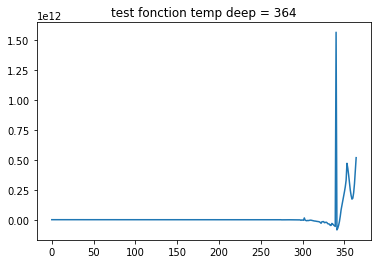

In [27]:
q=364
def f1(y,a):#,s):
    return (a@(y[::-1]))
        

def f2(n_train):
    rho, sigma = sm.regression.yule_walker(n_train,order=q)#, order=4,method="mle")
    return [rho,sigma]

print(f2(df_temp['Temp'])[1])

dft=df_temp['Temp']


dftN=dft.to_numpy().copy()

for i in range(365):
    dftN[-(364-i)]=f1(dftN[len(dftN)-365-q+i:len(dftN)-365+i],f2(dftN[len(dftN)-365:])[0])#,f2(dftN[len(dftN)-365:])[1])

plt.plot(dftN[len(dftN)-365:])
plt.title('test fonction temp deep = 364')